In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
import plotly.express as px
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OrdinalEncoder, RobustScaler
from sklearn.decomposition import PCA
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.datasets import load_iris, make_swiss_roll

import umap.umap_ as mp
import umap.plot

In [138]:
#sns.pairplot()

In [139]:
#df = pd.read_csv("diamonds.csv", index col=False)
#df = df.sample(5000, random_state=1138)

#target = df.pop("price")

In [140]:
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("pastel")
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['font.size'] = 12

In [141]:
df = pd.read_csv('diamonds.csv')

In [142]:
df = df[(df.y < 30) & (df.z < 30) & (df.x > 0) & ( df.z > 0) & (df.z > 0)].copy()

In [143]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53917 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53917 non-null  float64
 1   cut      53917 non-null  object 
 2   color    53917 non-null  object 
 3   clarity  53917 non-null  object 
 4   depth    53917 non-null  float64
 5   table    53917 non-null  float64
 6   price    53917 non-null  int64  
 7   x        53917 non-null  float64
 8   y        53917 non-null  float64
 9   z        53917 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [145]:
df.describe()

,carat,depth,table,price,x,y,z
count,53917.000000,53917.000000,53917.000000,53917.000000,53917.000000,53917.000000,53917.000000
mean,0.797687,61.749565,57.456939,3930.910474,5.731605,5.733428,3.539409
std,0.473777,1.432318,2.234069,3987.215003,1.119402,1.111272,0.691620
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,10.540000,6.980000


In [146]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [147]:
df['cut'] = df['cut'].astype('category')
df['color'] = df['color'].astype('category')
df['clarity'] = df['clarity'].astype('category')

Text(0, 0.5, 'Antal')

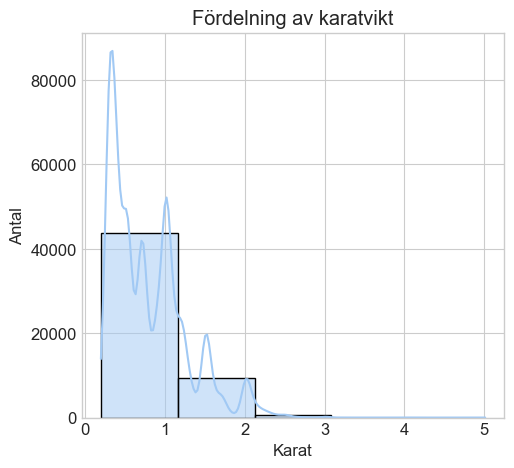

In [148]:
# Histogram för karatvikt
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['carat'], kde=True, bins=5)
plt.title('Fördelning av karatvikt')
plt.xlabel('Karat')
plt.ylabel('Antal')

Text(0, 0.5, 'Antal')

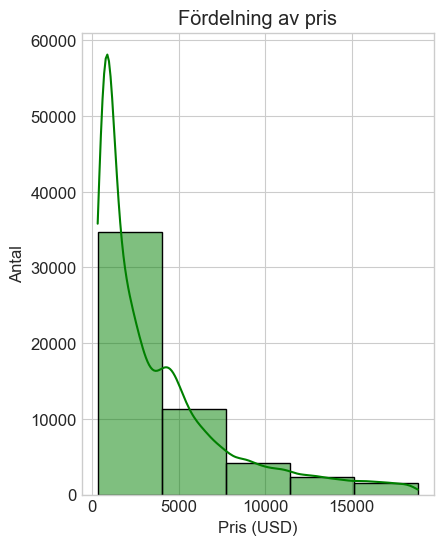

In [149]:
# Histogram för pris
plt.subplot(1, 2, 2)
sns.histplot(
    df['price'],
    kde=True,
    bins=5,
    color='green')
plt.title('Fördelning av pris')
plt.xlabel('Pris (USD)')
plt.ylabel('Antal')

Text(0, 0.5, 'Antal')

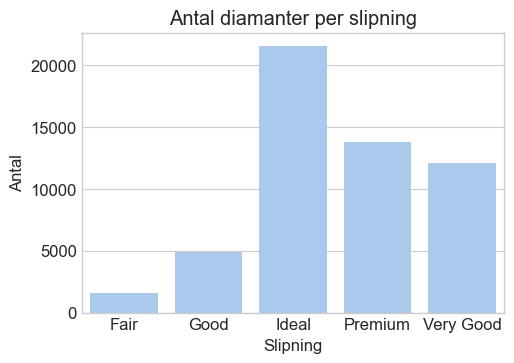

In [150]:
# Kategoriska variablers fördelning

# stapeldiagram för slipning (cut)
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
cut_counts = df['cut'].value_counts().sort_index()
sns.barplot(x=cut_counts.index, y=cut_counts.values)
plt.title('Antal diamanter per slipning')
plt.xlabel('Slipning')
plt.ylabel('Antal')
#plt.xticks(rotation=45)

Text(0, 0.5, 'Antal')

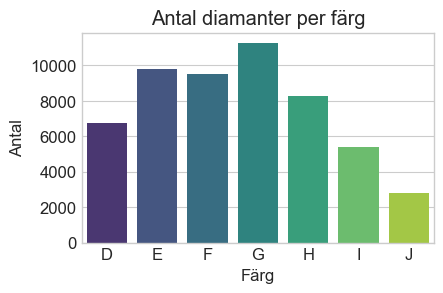

In [151]:
# stapeldiagram för färg
plt.subplot(2, 2, 2)
color_counts = df['color'].value_counts().sort_index()
sns.barplot(x=color_counts.index, y=color_counts.values, hue=color_counts.index, palette='viridis', legend=False)
plt.title('Antal diamanter per färg')
plt.xlabel('Färg')
plt.ylabel('Antal')

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'I1'),
  Text(1, 0, 'IF'),
  Text(2, 0, 'SI1'),
  Text(3, 0, 'SI2'),
  Text(4, 0, 'VS1'),
  Text(5, 0, 'VS2'),
  Text(6, 0, 'VVS1'),
  Text(7, 0, 'VVS2')])

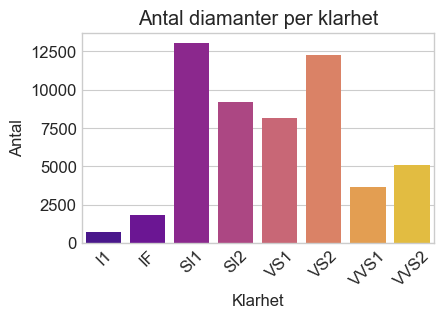

In [152]:
# stapeldiagram för klarhet
plt.subplot(2, 2, 3)
clarity_counts = df['clarity'].value_counts().sort_index()
sns.barplot(x=clarity_counts.index, y=clarity_counts.values, hue=clarity_counts.index, palette='plasma', legend=False)
plt.title('Antal diamanter per klarhet')
plt.xlabel('Klarhet')
plt.ylabel('Antal')
plt.xticks(rotation=45)

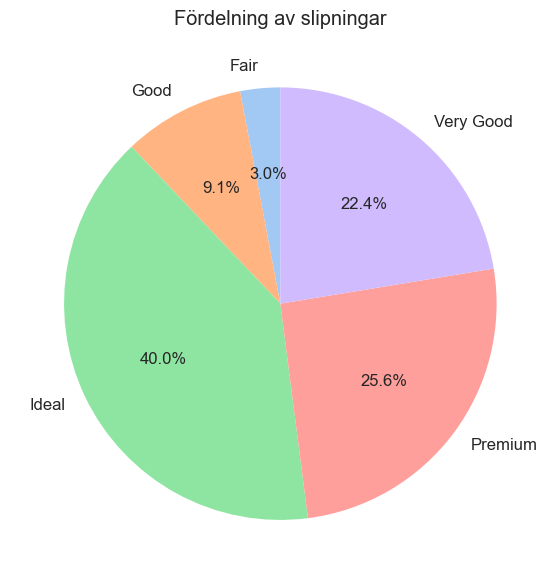

In [153]:
# cirkeldiagram för slipning

# Explodera små bitar (t.ex. < 5%) lite
explode = [0.1 if s < 5 else 0 for s in cut_counts.values]

plt.figure(figsize=(6, 6))
plt.pie(cut_counts.values, labels=cut_counts.index, autopct='%1.1f%%', startangle=90, explode=explode)
plt.title('Fördelning av slipningar')
plt.tight_layout()
plt.savefig('kategoriska_fördelningar.png')
#plt.close()

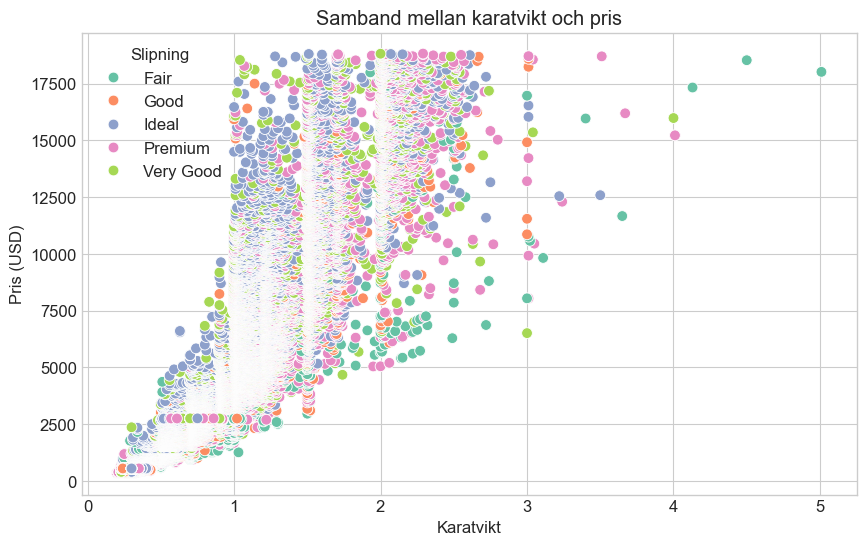

In [154]:
# Spridningsdiagram: Karat vs Pris
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='carat',
    y='price', 
    hue='cut',
    data=df, 
    palette='Set2', 
    s=60)

plt.title('Samband mellan karatvikt och pris')
plt.xlabel('Karatvikt')
plt.ylabel('Pris (USD)')
plt.legend(title='Slipning')

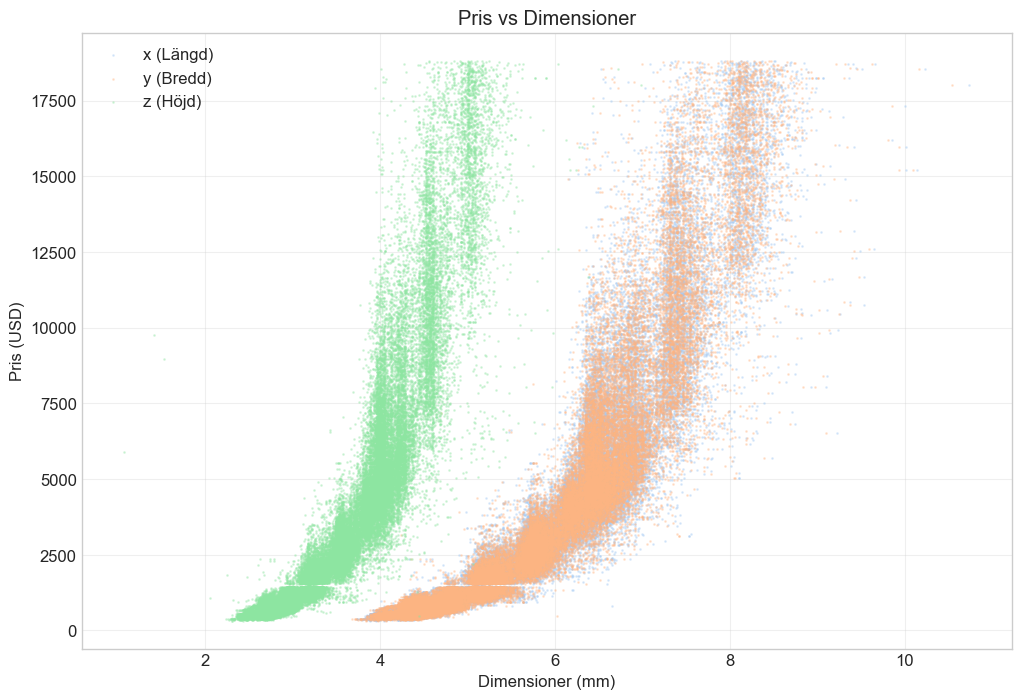

In [155]:
plt.figure(figsize=(12, 8))
plt.scatter(df['x'], df['price'], alpha=0.3, s=1, label='x (Längd)')

plt.scatter(df['y'], df['price'], alpha=0.3, s=1, label='y (Bredd)')

plt.scatter(df['z'], df['price'], alpha=0.3, s=1, label='z (Höjd)')

plt.xlabel('Dimensioner (mm)')

plt.ylabel('Pris (USD)')

plt.title('Pris vs Dimensioner')

plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Fair'),
  Text(1, 0, 'Good'),
  Text(2, 0, 'Ideal'),
  Text(3, 0, 'Premium'),
  Text(4, 0, 'Very Good')])

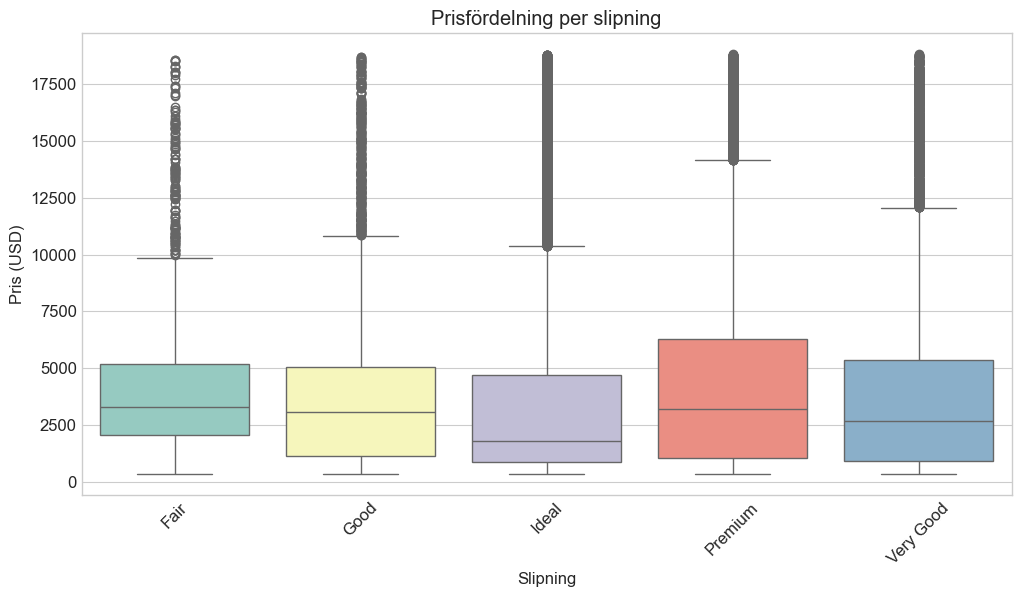

In [156]:
# boxplot: pris per slipning
plt.figure(figsize=(12, 6))
sns.boxplot(x='cut', y='price',hue='cut', data=df, palette='Set3', legend=False)
plt.title('Prisfördelning per slipning')
plt.xlabel('Slipning')
plt.ylabel('Pris (USD)')
plt.xticks(rotation=45)

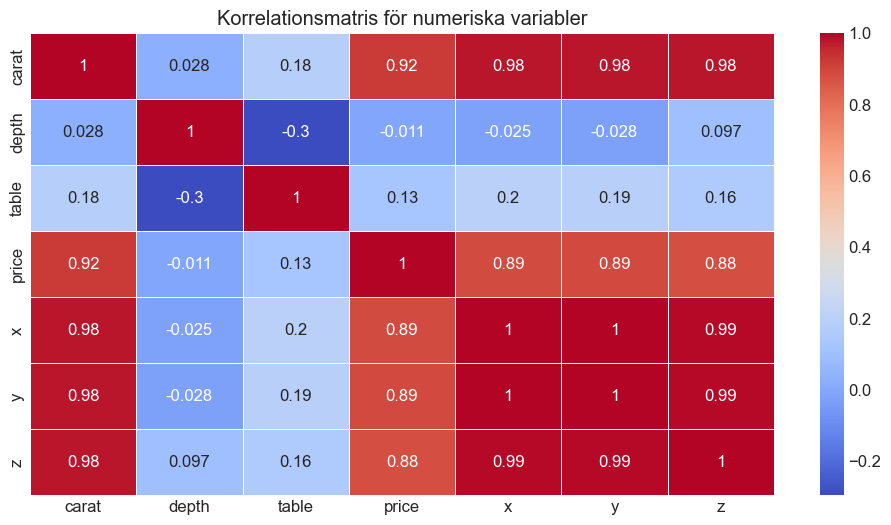

In [157]:
# 5 Korrelation mellan numberiska variabler
plt.figure(figsize=(12, 6))
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Korrelationsmatris för numeriska variabler')
plt.savefig('korrelationsmatris.png')

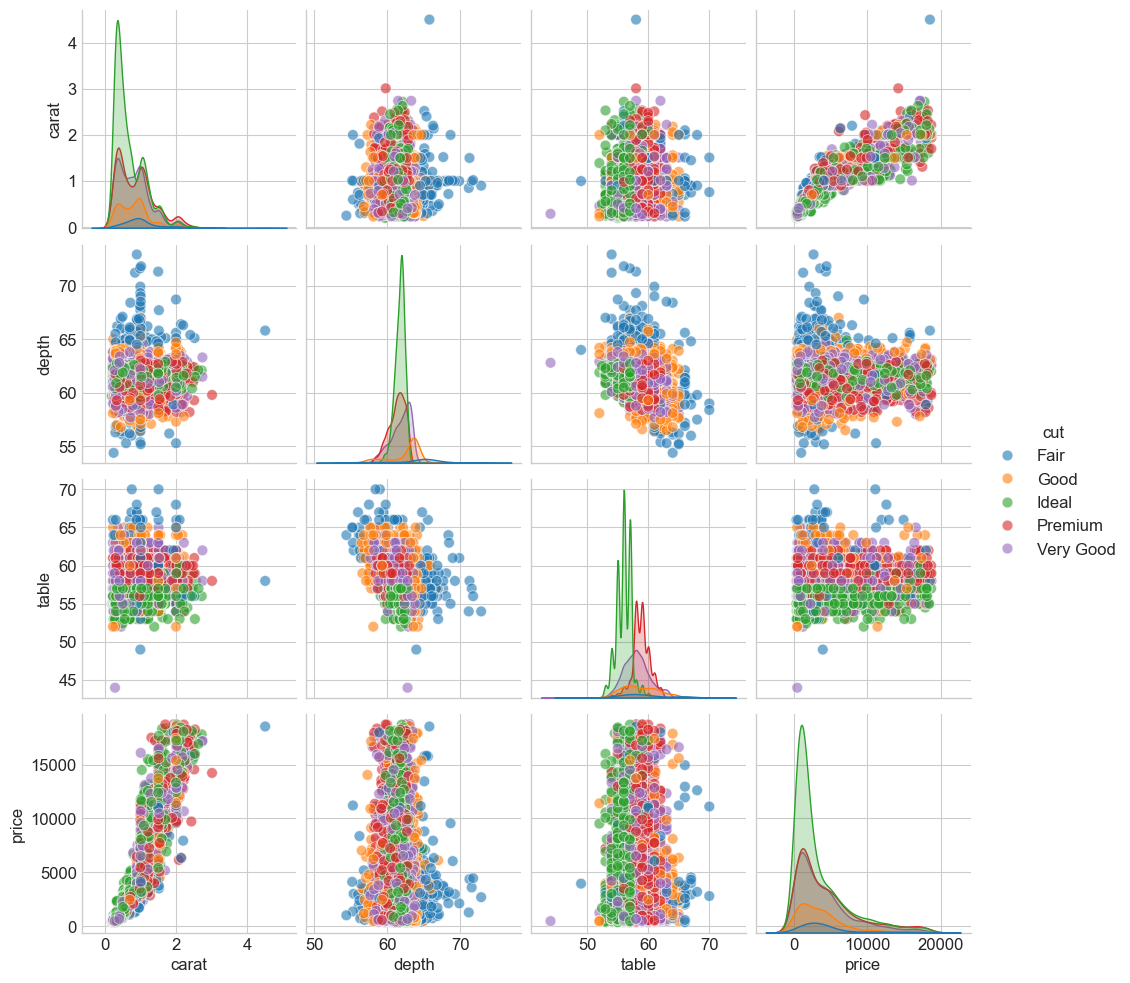

In [158]:
# 6. Parvisa samband
random_seed = np.random.randint(0, 10000)

df_sample = df.sample(n=5000, random_state=42)


sns.pairplot(df_sample, hue='cut', palette='tab10',
vars=['carat', 'depth', 'table', 'price'],
plot_kws={'alpha': 0.6, 's':60})

C:\Users\hultb\AppData\Local\Temp\ipykernel_39600\357272612.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




([0, 1, 2, 3, 4],
 [Text(0, 0, 'Fair'),
  Text(1, 0, 'Good'),
  Text(2, 0, 'Ideal'),
  Text(3, 0, 'Premium'),
  Text(4, 0, 'Very Good')])

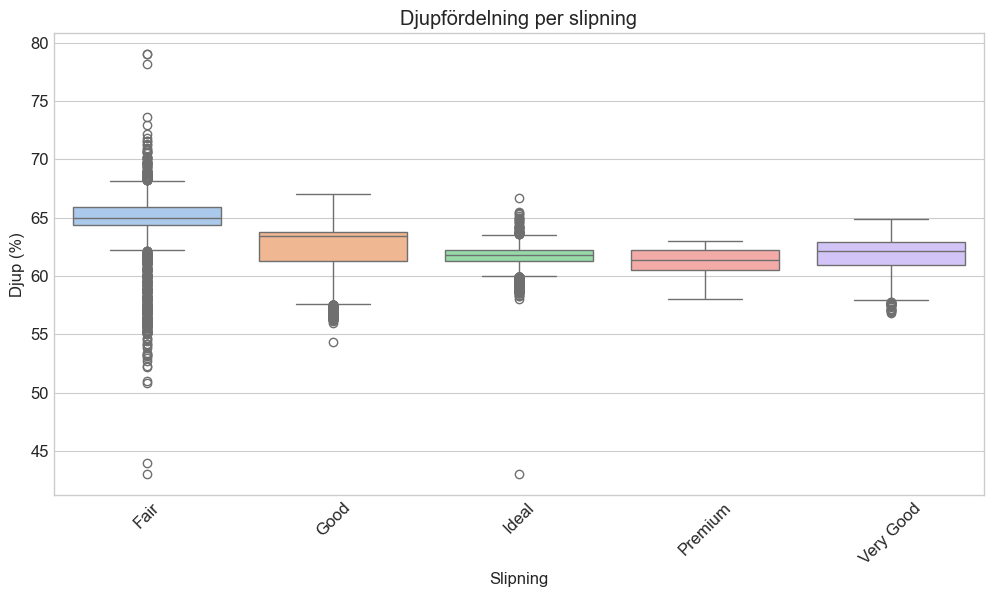

In [159]:
#7 Avancerad analys - lådagram (Boxplot) för djup per slipning
plt.figure(figsize=(12, 6))
sns.boxplot(x='cut', y='depth', data=df, palette='pastel')
plt.title('Djupfördelning per slipning')
plt.xlabel('Slipning')
plt.ylabel('Djup (%)')
plt.xticks(rotation=45) 

In [160]:
cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
df['cut_ord'] = df['cut'].map({v: i for i, v in enumerate(cut_order)})

In [161]:
clarity_order = ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']
df['clarity_ord'] = df['clarity'].map({v: i for i, v in enumerate(clarity_order)})

In [162]:
color_order = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
df['color_ord'] = df['color'].map({v: i for i, v in enumerate(color_order)})

In [163]:
# Beräkna volym
df['volym'] = df['x'] * df['y'] * df['z']
df['volume'] = df['volym']  # Alias för konsistens

In [164]:
df[['carat', 'volume', 'price']].corr()

,carat,volume,price
carat,1.000000,0.998941,0.921586
volume,0.998941,1.000000,0.923546
price,0.921586,0.923546,1.000000


In [165]:
# Skapa ordinala versioner för analys så högre siffra = bättre kvalitet
df['cut_ord'] = df['cut'].cat.codes + 1
df['color_ord'] = df['color'].cat.codes + 1  # D=1, E=2, ..., J=7 - men D är bäst
df['clarity_ord'] = df['clarity'].cat.codes + 1  # IF=1, VVS1=2, ..., I1=8 - men IF är bäst

In [166]:
# Korrigera ordinala så högre värde = bättre kvalitet
df['color_ord'] = len(color_order) + 1 - df['color_ord']  # Vänd så D=7, J=1
df['clarity_ord'] = len(clarity_order) + 1 - df['clarity_ord']  # Vänd så IF=8, I1=1

In [167]:
# Skapa karatgrupper
# Automatisk uppdelning med pandas cut
df['carat_group_auto'] = pd.cut(df['carat'], bins=5, labels=['Mycket liten', 'Liten', 'Medium', 'Stor', 'Mycket stor'])

In [168]:
# Manuell uppdelning med ordnad kategorisk variabel
def categorize_carat(carat):
    if carat < 0.5:
        return 'Liten (< 0.5)'
    elif carat < 1.0:
        return 'Medium (0.5-1.0)'
    elif carat < 1.5:
        return 'Stor (1.0-1.5)'
    elif carat < 2.0:
        return 'Mycket stor (1.5-2.0)'
    else:
        return 'Exceptionell (>2.0)'
    
df['carat_group'] = df['carat'].apply(categorize_carat)

In [169]:
# Gör karatgrupper till ordnad kategorisk variabel
carat_group_order = ['Liten (< 0.5)', 'Medium (0.5-1.0)', 'Stor (1.0-1.5)', 'Mycket stor (1.5-2.0)', 'Exceptionell (>2.0)']
df['carat_group'] = pd.Categorical(df['carat_group'], categories=carat_group_order, ordered=True)

Text(0.5, 1.0, 'Linear Regression: Pris vs Karat')

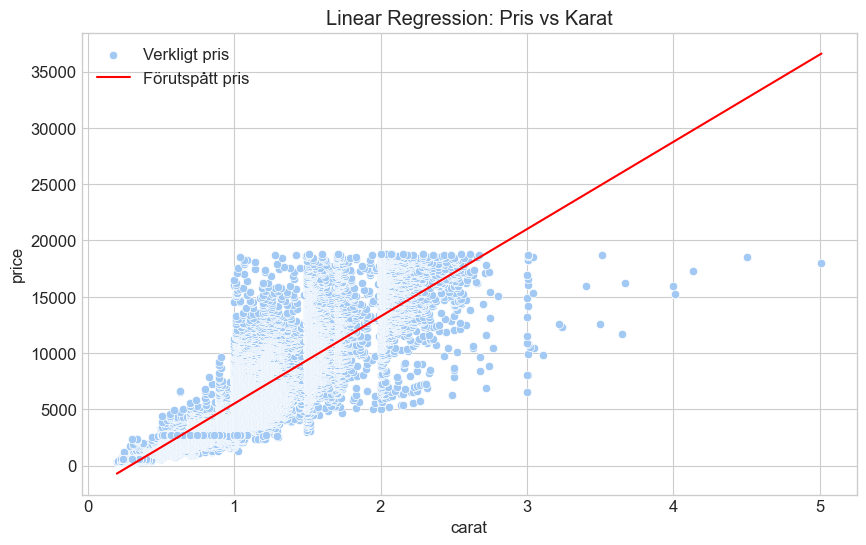

In [170]:
# skapa x och y
X = df[['carat']]
y = df['price']

# modell
model = LinearRegression()
model.fit(X, y)

# prediktion
df['price_predicted'] = model.predict(X)

# visa verkliga vs predikterade priser
sns.scatterplot(x=df['carat'], y=df['price'], label="Verkligt pris")
sns.lineplot(x=df['carat'], y=df['price_predicted'], color='red', label="Förutspått pris")
plt.title("Linear Regression: Pris vs Karat")

In [171]:
# välj features
features = ['carat', 'cut', 'color', 'clarity']
target = 'price'

X = df[features]
y = df[target]

# one-hot encode kategoriska variabler
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), ['cut', 'color', 'clarity'])
    ],
    remainder='passthrough' #behåll carat som den är
)

# modell
model = make_pipeline(preprocessor, LinearRegression())
model.fit(X, y)

print("Träffsäkerhet (R²):", model.score(X, y))

Träffsäkerhet (R²): 0.9159153437982398


In [172]:
# Ensure 'volume' exists in the sampled dataframe
sample_df = df.sample(2000).copy()
if 'volume' not in sample_df.columns:
    sample_df['volume'] = sample_df['x'] * sample_df['y'] * sample_df['z']

fig = px.scatter_3d(
    sample_df,
    x='volume',
    y='carat',
    z='price',
    color='cut',  # kategorisk färg
    opacity=0.5
)

fig.update_layout(title="Volym vs Karat vs Pris")
fig.show()

In [173]:
fig = px.scatter_3d(
    df.sample(2000),
    x='volume',
    y='clarity_ord',
    z='price',
    color='color',
    opacity=0.5
)

fig.update_layout(title="Volym vs Klarhet vs Pris")

In [174]:
fig = px.scatter_3d(
    df.sample(2000),
    x='carat',
    y='cut_ord',
    z='price',
    color='clarity',
    opacity=0.5
)

fig.update_layout(title="Karat vs Slipning vs Pris")
fig.show()

In [175]:
features = ['carat', 'cut_ord', 'color_ord', 'clarity_ord', 'depth', 'table', 'volume']
X = df[features]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

print("R²-score på testdata:", rf.score(X_test, y_test))

R²-score på testdata: 0.9821722311112914


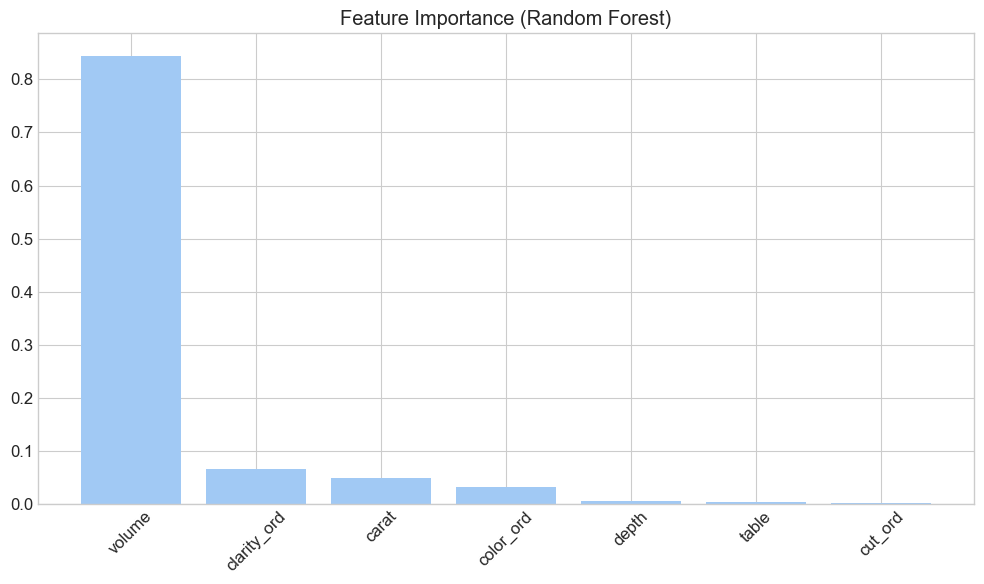

In [176]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = [features[i] for i in indices]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance (Random Forest)")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), feature_names, rotation=45)
plt.tight_layout()

In [177]:
# dela in carat i 5 intervall automatiskt
df['carat_group'] = pd.cut(df['carat'], bins=5)
df['carat_group'].value_counts().sort_index()

carat_group
(0.195, 1.162]    43768
(1.162, 2.124]     9473
(2.124, 3.086]      662
(3.086, 4.048]       11
(4.048, 5.01]         3
Name: count, dtype: int64

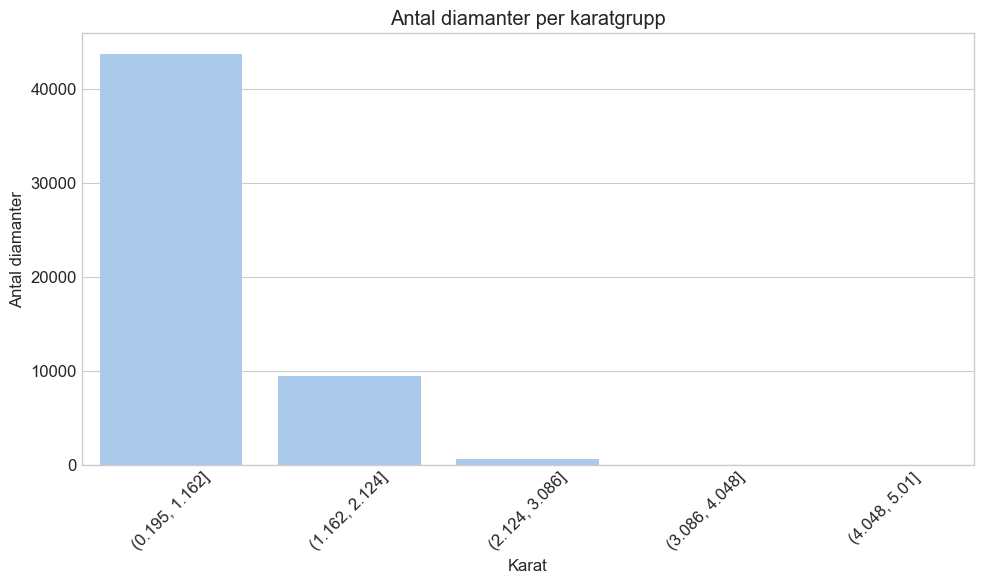

In [178]:
sns.countplot(data=df, x='carat_group', order=df['carat_group'].value_counts().sort_index().index)
plt.title("Antal diamanter per karatgrupp")
plt.xlabel("Karat")
plt.ylabel("Antal diamanter")
plt.xticks(rotation=45)
plt.tight_layout()

In [179]:
# dela upp karat i olika grupper med pandas cut
bins = [0, 1, 2, 3, df['carat'].max()]
labels = ['0–1 carat', '1–2 carat', '2–3 carat', '>3 carat']
df['carat_group'] = pd.cut(df['carat'], bins=bins, labels=labels)


In [180]:
# cut och color i siffror
group_summary = df.groupby('carat_group').agg(
    count=('price', 'count'),
    mean_price=('price', 'mean'),
    mean_volume=('volume', 'mean'),
    mean_clarity=('clarity_ord', 'mean'),
    mean_cut=('cut_ord', 'mean'),
    mean_color=('color_ord', 'mean')
).round(2)

group_summary


C:\Users\hultb\AppData\Local\Temp\ipykernel_39600\360895678.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,count,mean_price,mean_volume,mean_clarity,mean_cut,mean_color
carat_group,,,,,,
0–1 carat,36432,1786.79,86.73,3.99,3.53,4.70
1–2 carat,15602,7608.25,203.98,4.47,3.61,3.92
2–3 carat,1851,14940.47,345.28,5.03,3.60,2.78
>3 carat,32,15243.00,532.73,6.72,2.81,2.34


In [181]:
# cut och color i text
group_summary = df.groupby('carat_group').agg(
    count=('price', 'count'),
    mean_price=('price', 'mean'),
    mean_volume=('volume', 'mean'),
    mean_clarity=('clarity_ord', 'mean'),
    most_common_cut=('cut', lambda x: x.mode()[0]),
    most_common_color=('color', lambda x: x.mode()[0])
).round(2)

group_summary


C:\Users\hultb\AppData\Local\Temp\ipykernel_39600\3829498181.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,count,mean_price,mean_volume,mean_clarity,most_common_cut,most_common_color
carat_group,,,,,,
0–1 carat,36432,1786.79,86.73,3.99,Ideal,E
1–2 carat,15602,7608.25,203.98,4.47,Ideal,G
2–3 carat,1851,14940.47,345.28,5.03,Premium,I
>3 carat,32,15243.00,532.73,6.72,Premium,I


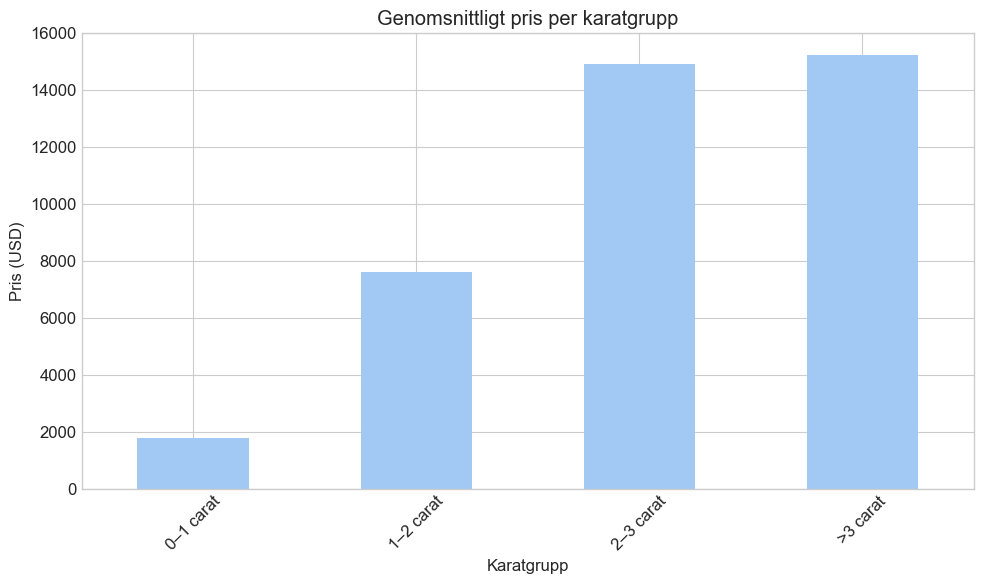

In [182]:
group_summary['mean_price'].plot(
    kind='bar', 
    title='Genomsnittligt pris per karatgrupp',
    ylabel='Pris (USD)',
    xlabel='Karatgrupp',
    )

plt.xticks(rotation=45)
plt.tight_layout()

In [183]:
for group in labels:
    sub = df[df['carat_group'] == group]
    if sub.empty:
        continue  # hoppa över tomma grupper

    print(f"🔹 Grupp: {group}")
    print(f"- Antal diamanter: {len(sub)}")
    print(f"- Genomsnittspris: {sub['price'].mean():.2f}")
    print(f"- Genomsnittlig volym: {sub['volume'].mean():.2f}")
    print(f"- Genomsnittlig klarhet (ordinal): {sub['clarity_ord'].mean():.2f}")
    print(f"- Vanligaste slipning: {sub['cut'].mode()[0]}")
    print(f"- Vanligaste färg: {sub['color'].mode()[0]}")
    print()

🔹 Grupp: 0–1 carat
- Antal diamanter: 36432
- Genomsnittspris: 1786.79
- Genomsnittlig volym: 86.73
- Genomsnittlig klarhet (ordinal): 3.99
- Vanligaste slipning: Ideal
- Vanligaste färg: E

🔹 Grupp: 1–2 carat
- Antal diamanter: 15602
- Genomsnittspris: 7608.25
- Genomsnittlig volym: 203.98
- Genomsnittlig klarhet (ordinal): 4.47
- Vanligaste slipning: Ideal
- Vanligaste färg: G

🔹 Grupp: 2–3 carat
- Antal diamanter: 1851
- Genomsnittspris: 14940.47
- Genomsnittlig volym: 345.28
- Genomsnittlig klarhet (ordinal): 5.03
- Vanligaste slipning: Premium
- Vanligaste färg: I

🔹 Grupp: >3 carat
- Antal diamanter: 32
- Genomsnittspris: 15243.00
- Genomsnittlig volym: 532.73
- Genomsnittlig klarhet (ordinal): 6.72
- Vanligaste slipning: Premium
- Vanligaste färg: I



In [184]:
for group in labels:
    sub = df[df['carat_group'] == group]
    if sub.empty:
        continue  # hoppa över tomma grupper

    print(f"🔹 Grupp: {group}")
    print(f"- Antal diamanter: {len(sub)}")
    print(f"- Genomsnittspris: {sub['price'].mean():.2f}")
    print(f"- Genomsnittlig volym: {sub['volume'].mean():.2f}")
    print(f"- Genomsnittlig klarhet (ordinal): {sub['clarity_ord'].mean():.2f}")
    print(f"- Vanligaste slipning: {sub['cut_ord'].mean():.2f}")
    print(f"- Vanligaste färg: {sub['color_ord'].mean():.2f}")
    print()

🔹 Grupp: 0–1 carat
- Antal diamanter: 36432
- Genomsnittspris: 1786.79
- Genomsnittlig volym: 86.73
- Genomsnittlig klarhet (ordinal): 3.99
- Vanligaste slipning: 3.53
- Vanligaste färg: 4.70

🔹 Grupp: 1–2 carat
- Antal diamanter: 15602
- Genomsnittspris: 7608.25
- Genomsnittlig volym: 203.98
- Genomsnittlig klarhet (ordinal): 4.47
- Vanligaste slipning: 3.61
- Vanligaste färg: 3.92

🔹 Grupp: 2–3 carat
- Antal diamanter: 1851
- Genomsnittspris: 14940.47
- Genomsnittlig volym: 345.28
- Genomsnittlig klarhet (ordinal): 5.03
- Vanligaste slipning: 3.60
- Vanligaste färg: 2.78

🔹 Grupp: >3 carat
- Antal diamanter: 32
- Genomsnittspris: 15243.00
- Genomsnittlig volym: 532.73
- Genomsnittlig klarhet (ordinal): 6.72
- Vanligaste slipning: 2.81
- Vanligaste färg: 2.34



In [185]:
features = ['carat', 'cut_ord', 'color_ord', 'clarity_ord', 'depth', 'table', 'volume']
X = df[features].copy()

# Skala värdena för bättre UMAP-resultat
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

In [186]:
reducer = mp.UMAP(n_components=3, random_state=42)
embedding = reducer.fit_transform(X_scaled)

c:\Users\hultb\Skola\Python\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\hultb\Skola\Python\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [189]:
df['carat_group_auto'] = pd.cut(df['carat'], bins=5, labels=['Mycket liten', 'Liten', 'Medium', 'Stor', 'Mycket stor'])

In [193]:
 # Manuell uppdelning med ordnad kategorisk variabel
def categorize_carat(carat):
    if carat < 0.5:
        return 'Liten (< 0.5)'
    elif carat < 1.0:
        return 'Medium (0.5-1.0)'
    elif carat < 1.5:
        return 'Stor (1.0-1.5)'
    elif carat < 2.0:
        return 'Mycket stor (1.5-2.0)'
    else:
        return 'Exceptionell (>2.0)'


In [194]:
df['carat_group'] = df['carat'].apply(categorize_carat)

In [191]:
# Gör karatgrupper till ordnad kategorisk variabel
carat_group_order = ['Liten (< 0.5)', 'Medium (0.5-1.0)', 'Stor (1.0-1.5)', 'Mycket stor (1.5-2.0)', 'Exceptionell (>2.0)']
df['carat_group'] = pd.Categorical(df['carat_group'], categories=carat_group_order, ordered=True)

In [192]:
df.to_csv('cleaned_diamonds.csv', index=False)